In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short']=='Data Analyst']

In [10]:
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary =('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values(by = 'skill_count', ascending= False).head(10)

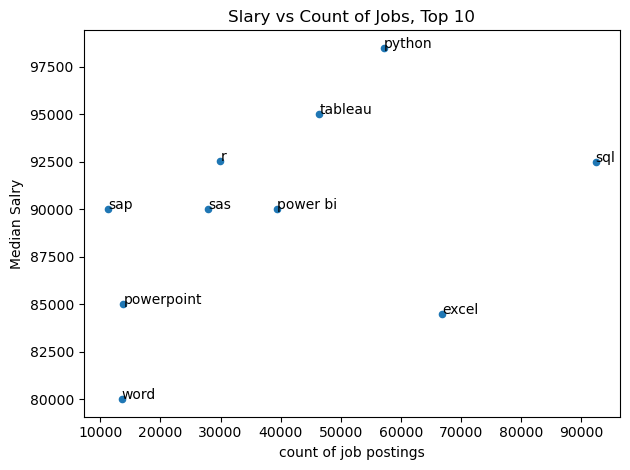

In [18]:
skill_stats.plot(kind= 'scatter', x='skill_count', y='median_salary')
plt.xlabel('count of job postings')
plt.ylabel('Median Salry')
plt.title('Slary vs Count of Jobs, Top 10')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()